### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
# https://www.youtube.com/watch?v=H6du_pfuznE
### Keras and Tensorflow >2.0

In [2]:
### Data Collection
import pandas_datareader as pdr
key = "7ec65e0ceb0a9e62ec3974a80c24464b729aacc4"
df = pdr.get_data_tiingo('AAPL', api_key=key)
df.to_csv('AAPL.csv')

In [3]:
import pandas as pd
df=pd.read_csv('AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-12-07 00:00:00+00:00,118.28,119.86,117.810,118.98,32084249,27.392297,27.758207,27.283451,27.554409,128336996,0.0,1.0
1,AAPL,2015-12-08 00:00:00+00:00,118.23,118.60,116.860,117.52,34309450,27.380718,27.466406,27.063442,27.216290,137237800,0.0,1.0
2,AAPL,2015-12-09 00:00:00+00:00,115.62,117.69,115.080,117.64,46361357,26.776272,27.255660,26.651214,27.244081,185445428,0.0,1.0
3,AAPL,2015-12-10 00:00:00+00:00,116.17,116.94,115.510,116.04,29212727,26.903646,27.081969,26.750797,26.873539,116850908,0.0,1.0
4,AAPL,2015-12-11 00:00:00+00:00,113.18,115.39,112.851,115.19,46886161,26.211196,26.723006,26.135003,26.676689,187544644,0.0,1.0


In [4]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2020-11-27 00:00:00+00:00,116.59,117.4900,116.22,116.57,46691331,116.59,117.4900,116.22,116.57,46691331,0.0,1.0
1254,AAPL,2020-11-30 00:00:00+00:00,119.05,120.9700,116.81,116.97,169410176,119.05,120.9700,116.81,116.97,169410176,0.0,1.0
1255,AAPL,2020-12-01 00:00:00+00:00,122.72,123.4693,120.01,121.01,125920963,122.72,123.4693,120.01,121.01,125920963,0.0,1.0
1256,AAPL,2020-12-02 00:00:00+00:00,123.08,123.3700,120.89,122.02,89004195,123.08,123.3700,120.89,122.02,89004195,0.0,1.0
1257,AAPL,2020-12-03 00:00:00+00:00,122.94,123.7800,122.21,123.52,78601338,122.94,123.7800,122.21,123.52,78601338,0.0,1.0


In [5]:
df1 = df.reset_index()['close']
df1

0       118.28
1       118.23
2       115.62
3       116.17
4       113.18
         ...  
1253    116.59
1254    119.05
1255    122.72
1256    123.08
1257    122.94
Name: close, Length: 1258, dtype: float64

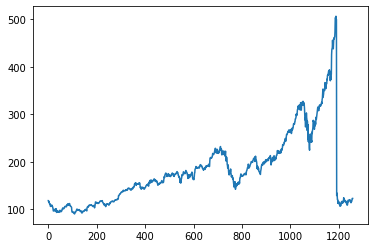

In [6]:
import matplotlib.pyplot as plt
plt.plot(df1);

In [8]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [9]:
print(df1)

[[0.06720385]
 [0.06708358]
 [0.06080577]
 ...
 [0.07788334]
 [0.07874925]
 [0.07841251]]


In [10]:
##splitting dataset into train and test split
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :1]

In [11]:
training_size,test_size

(817, 441)

In [12]:
train_data

array([[0.06720385],
       [0.06708358],
       [0.06080577],
       [0.06212868],
       [0.05493686],
       [0.05325316],
       [0.04846663],
       [0.05051112],
       [0.04483464],
       [0.03773903],
       [0.0408659 ],
       [0.04062538],
       [0.04394468],
       [0.04254961],
       [0.03963921],
       [0.04425737],
       [0.04084185],
       [0.03588695],
       [0.03610343],
       [0.02975346],
       [0.02491882],
       [0.01469633],
       [0.01592303],
       [0.01969934],
       [0.02313891],
       [0.01695731],
       [0.02208058],
       [0.01633193],
       [0.01520144],
       [0.01551413],
       [0.01433554],
       [0.02665063],
       [0.02188815],
       [0.02321106],
       [0.0074083 ],
       [0.00901984],
       [0.01683704],
       [0.01464823],
       [0.00995791],
       [0.0144558 ],
       [0.01505713],
       [0.00885147],
       [0.01123271],
       [0.01118461],
       [0.0094528 ],
       [0.00808178],
       [0.00877931],
       [0.015

In [15]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [20]:
print(X_test.shape), print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , 1)

In [22]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

/Users/My/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/My/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/My/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/My/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework

In [23]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=100, batch_size=64, verbose=1)

Train on 716 samples, validate on 340 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
716/716 [==============================] - 66s 92ms/sample - loss: 0.0114 - val_loss: 0.0398
Epoch 2/100
716/716 [==============================] - 18s 25ms/sample - loss: 0.0025 - val_loss: 0.0201
Epoch 3/100
716/716 [==============================] - 25s 35ms/sample - loss: 7.8522e-04 - val_loss: 0.0206
Epoch 4/100
716/716 [==============================] - 33s 46ms/sample - loss: 4.1093e-04 - val_loss: 0.0177
Epoch 5/100
716/716 [==============================] - 84s 117ms/sample - loss: 2.9470e-04 - val_loss: 0.0168
Epoch 6/100
716/716 [==============================] - 116s 162ms/sample - loss: 2.7571e-04 - val_loss: 0.0166
Epoch 7/100
716/716 [==============================] - 33s 47ms/sample - loss: 2.7106e-04 - val_loss: 0.0161
Epoch 8/100
716/716 [==============================] - 20s 28ms/sample - loss: 2.5781e-04 - val_loss: 

716/716 [==============================] - 14s 19ms/sample - loss: 1.1431e-04 - val_loss: 0.0087
Epoch 73/100
716/716 [==============================] - 14s 20ms/sample - loss: 1.2271e-04 - val_loss: 0.0084
Epoch 74/100
716/716 [==============================] - 15s 21ms/sample - loss: 1.3374e-04 - val_loss: 0.0082
Epoch 75/100
716/716 [==============================] - 14s 20ms/sample - loss: 1.5987e-04 - val_loss: 0.0085
Epoch 76/100
716/716 [==============================] - 13s 19ms/sample - loss: 1.2982e-04 - val_loss: 0.0079
Epoch 77/100
716/716 [==============================] - 13s 18ms/sample - loss: 1.1282e-04 - val_loss: 0.0079
Epoch 78/100
716/716 [==============================] - 13s 19ms/sample - loss: 1.0900e-04 - val_loss: 0.0083
Epoch 79/100
716/716 [==============================] - 14s 19ms/sample - loss: 1.1982e-04 - val_loss: 0.0077
Epoch 80/100
716/716 [==============================] - 14s 20ms/sample - loss: 1.2675e-04 - val_loss: 0.0079
Epoch 81/100
716/716 [=

In [27]:
import tensorflow as tf
tf.__version__

'1.14.0'

In [28]:
### Lets Do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [29]:
##Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [31]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

158.01902337702197

In [32]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

271.33376207384674

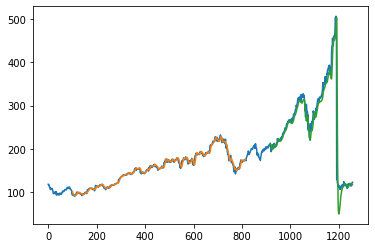

In [34]:
### Plotting 
# shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
len(test_data)

441

In [36]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [37]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input

[0.7229344558027659,
 0.7113650030066145,
 0.7094888755261575,
 0.7290198436560433,
 0.7159591100420926,
 0.7185808779314491,
 0.6759831629585087,
 0.673770294648226,
 0.6948887552615755,
 0.6799037883343355,
 0.6971016235718581,
 0.7081659651232712,
 0.8050511124473845,
 0.830811785929044,
 0.8378111846061336,
 0.841635598316296,
 0.8785808779314492,
 0.8517378232110644,
 0.8672760072158752,
 0.8350210463018641,
 0.8699939867708961,
 0.8892363199037885,
 0.8882501503307276,
 0.8853638003607938,
 0.89455201443175,
 0.8959470835838845,
 0.9206494287432352,
 0.9792904389657247,
 0.9936019242333134,
 0.9836680697534577,
 1.0,
 0.9854479855682503,
 0.983499699338545,
 0.09308478653036678,
 0.10544798556825014,
 0.09876127480457003,
 0.07345760673481655,
 0.07365003006614551,
 0.05407095610342749,
 0.06489476849067943,
 0.055682501503307225,
 0.052098616957306054,
 0.0601683704149128,
 0.06061334936861096,
 0.05241130487071555,
 0.04810583283223091,
 0.03968731208659049,
 0.0474804570054118

In [38]:
# demonstrate prediction for next 10 days
lst_output = []
n_steps = 100
i = 0
while (i < 30):
    if (len(temp_input) > 100):
        #print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1

print(lst_output)

[0.07040118]
101
1 day input [0.711365   0.70948888 0.72901984 0.71595911 0.71858088 0.67598316
 0.67377029 0.69488876 0.67990379 0.69710162 0.70816597 0.80505111
 0.83081179 0.83781118 0.8416356  0.87858088 0.85173782 0.86727601
 0.83502105 0.86999399 0.88923632 0.88825015 0.8853638  0.89455201
 0.89594708 0.92064943 0.97929044 0.99360192 0.98366807 1.
 0.98544799 0.9834997  0.09308479 0.10544799 0.09876127 0.07345761
 0.07365003 0.05407096 0.06489477 0.0556825  0.05209862 0.06016837
 0.06061335 0.0524113  0.04810583 0.03968731 0.04748046 0.05164161
 0.04036079 0.04300661 0.0527721  0.05921828 0.05712568 0.06126278
 0.06361996 0.05455201 0.06292243 0.05488876 0.05950692 0.05924233
 0.06405292 0.08192423 0.07398677 0.07420325 0.07304871 0.06898376
 0.06167168 0.06535177 0.06381239 0.06111846 0.0594107  0.05943476
 0.06316296 0.05017438 0.06008419 0.044546   0.04432952 0.04834636
 0.05919423 0.06900782 0.06819002 0.06248948 0.06164762 0.07011425
 0.06944077 0.06956103 0.07206254 0.06987

8 day output [[0.07745896]]
9 day input [0.67990379 0.69710162 0.70816597 0.80505111 0.83081179 0.83781118
 0.8416356  0.87858088 0.85173782 0.86727601 0.83502105 0.86999399
 0.88923632 0.88825015 0.8853638  0.89455201 0.89594708 0.92064943
 0.97929044 0.99360192 0.98366807 1.         0.98544799 0.9834997
 0.09308479 0.10544799 0.09876127 0.07345761 0.07365003 0.05407096
 0.06489477 0.0556825  0.05209862 0.06016837 0.06061335 0.0524113
 0.04810583 0.03968731 0.04748046 0.05164161 0.04036079 0.04300661
 0.0527721  0.05921828 0.05712568 0.06126278 0.06361996 0.05455201
 0.06292243 0.05488876 0.05950692 0.05924233 0.06405292 0.08192423
 0.07398677 0.07420325 0.07304871 0.06898376 0.06167168 0.06535177
 0.06381239 0.06111846 0.0594107  0.05943476 0.06316296 0.05017438
 0.06008419 0.044546   0.04432952 0.04834636 0.05919423 0.06900782
 0.06819002 0.06248948 0.06164762 0.07011425 0.06944077 0.06956103
 0.07206254 0.06987372 0.06660253 0.06806975 0.06494287 0.05654841
 0.05972339 0.06179194 0

17 day output [[0.08001324]]
18 day input [0.86727601 0.83502105 0.86999399 0.88923632 0.88825015 0.8853638
 0.89455201 0.89594708 0.92064943 0.97929044 0.99360192 0.98366807
 1.         0.98544799 0.9834997  0.09308479 0.10544799 0.09876127
 0.07345761 0.07365003 0.05407096 0.06489477 0.0556825  0.05209862
 0.06016837 0.06061335 0.0524113  0.04810583 0.03968731 0.04748046
 0.05164161 0.04036079 0.04300661 0.0527721  0.05921828 0.05712568
 0.06126278 0.06361996 0.05455201 0.06292243 0.05488876 0.05950692
 0.05924233 0.06405292 0.08192423 0.07398677 0.07420325 0.07304871
 0.06898376 0.06167168 0.06535177 0.06381239 0.06111846 0.0594107
 0.05943476 0.06316296 0.05017438 0.06008419 0.044546   0.04432952
 0.04834636 0.05919423 0.06900782 0.06819002 0.06248948 0.06164762
 0.07011425 0.06944077 0.06956103 0.07206254 0.06987372 0.06660253
 0.06806975 0.06494287 0.05654841 0.05972339 0.06179194 0.06313891
 0.06905592 0.07788334 0.07874925 0.07841251 0.07040118 0.07295278
 0.07460243 0.07558618

25 day output [[0.08240066]]
26 day input [0.92064943 0.97929044 0.99360192 0.98366807 1.         0.98544799
 0.9834997  0.09308479 0.10544799 0.09876127 0.07345761 0.07365003
 0.05407096 0.06489477 0.0556825  0.05209862 0.06016837 0.06061335
 0.0524113  0.04810583 0.03968731 0.04748046 0.05164161 0.04036079
 0.04300661 0.0527721  0.05921828 0.05712568 0.06126278 0.06361996
 0.05455201 0.06292243 0.05488876 0.05950692 0.05924233 0.06405292
 0.08192423 0.07398677 0.07420325 0.07304871 0.06898376 0.06167168
 0.06535177 0.06381239 0.06111846 0.0594107  0.05943476 0.06316296
 0.05017438 0.06008419 0.044546   0.04432952 0.04834636 0.05919423
 0.06900782 0.06819002 0.06248948 0.06164762 0.07011425 0.06944077
 0.06956103 0.07206254 0.06987372 0.06660253 0.06806975 0.06494287
 0.05654841 0.05972339 0.06179194 0.06313891 0.06905592 0.07788334
 0.07874925 0.07841251 0.07040118 0.07295278 0.07460243 0.07558618
 0.07617759 0.07657423 0.07688946 0.07717736 0.07745896 0.07774023
 0.07802188 0.078303

In [39]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)
len(df1)

1258

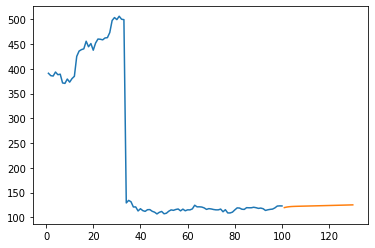

In [40]:
plt.plot(day_new, scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

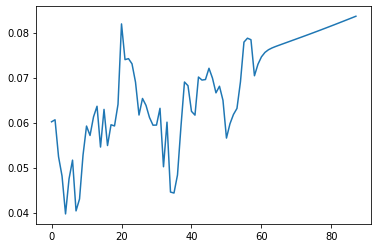

In [41]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

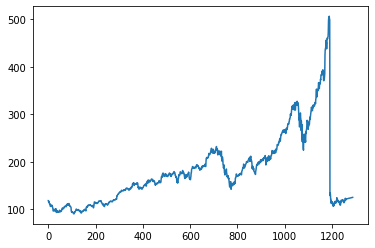

In [42]:
df3 = scaler.inverse_transform(df3).tolist()
plt.plot(df3)